In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [2]:
data = pd.read_csv('C:/Users/Lenovo/EncryptixML/spam.csv',encoding='iso-8859-1')[['v1', 'v2']]

In [3]:
import os

file_path = 'C:/Users/Lenovo/EncryptixML/spam.csv'
print(os.path.exists(file_path))


True


In [4]:
data

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [5]:
data.rename(columns = {"v1":"Target", "v2":"Text"}, inplace = True)
data.head()

,Target,Text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [30]:
data.shape

(5572, 2)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Target  5572 non-null   object
 1   Text    5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [7]:
data.isna().sum()

Target    0
Text      0
dtype: int64

In [8]:
data = data.drop_duplicates(keep = 'first')
data

,Target,Text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [9]:
data['Target'].value_counts()

Target
ham     4516
spam     653
Name: count, dtype: int64

In [54]:
#import matplotlib.pyplot as plt
#import seaborn as sns

#cols= ["#E1F16B", "#E598D8"] 
#first of all let us evaluate the target and find out if our data is imbalanced or not
#plt.figure(figsize=(12,8))
#fg = sns.countplot(x= data["Target"], palette= cols)
#fg.set_title("Count Plot of Classes", color="#58508d")
#fg.set_xlabel("Classes", color="#58508d")
#fg.set_ylabel("Number of Data points", color="#58508d")

In [7]:
#from sklearn.preprocessing import LabelEncoder
#encoder = LabelEncoder()
#data['Target'] = encoder.fit_transform(data['Target'])


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_15648\183769319.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Target'] = encoder.fit_transform(data['Target'])


In [10]:
data.loc[data['Target'] == 'spam', 'Target',] = 0
data.loc[data['Target'] == 'ham', 'Target',] = 1

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18692\3487353623.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.loc[data['Target'] == 'spam', 'Target',] = 0
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18692\3487353623.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.loc[data['Target'] == 'ham', 'Target',] = 1


In [11]:

data

,Target,Text
0,1,"Go until jurong point, crazy.. Available only ..."
1,1,Ok lar... Joking wif u oni...
2,0,Free entry in 2 a wkly comp to win FA Cup fina...
3,1,U dun say so early hor... U c already then say...
4,1,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,0,This is the 2nd time we have tried 2 contact u...
5568,1,Will Ì_ b going to esplanade fr home?
5569,1,"Pity, * was in mood for that. So...any other s..."
5570,1,The guy did some bitching but I acted like i'd...


In [12]:
data.groupby("Target").describe()

Text                                                               
       count unique                                                top freq
Target                                                                     
0        653    653  Free entry in 2 a wkly comp to win FA Cup fina...    1
1       4516   4516  Go until jurong point, crazy.. Available only ...    1

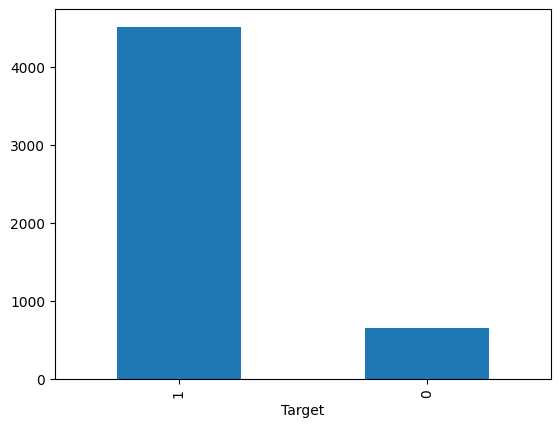

In [13]:
data.Target.value_counts().plot.bar();

In [14]:
X = data['Text']

Y = data['Target']

In [15]:
X

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                Will Ì_ b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: Text, Length: 5169, dtype: object

In [42]:
Y

0       1
1       1
2       0
3       1
4       1
       ..
5567    0
5568    1
5569    1
5570    1
5571    1
Name: Target, Length: 5169, dtype: object

In [33]:

x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size = 0.3, random_state = 10)

In [17]:
len(x_train), len(y_train)

(3618, 3618)

In [18]:
len(x_test),len(y_test)

(1551, 1551)

In [34]:
# transform the text data to feature vectors that can be used as input to the Logistic regression

feature_extraction = TfidfVectorizer(min_df = 1, stop_words='english', lowercase=True)

X_train_features = feature_extraction.fit_transform(x_train)
X_test_features = feature_extraction.transform(x_test)

# convert Y_train and Y_test values as integers

Y_train = y_train.astype('int')
Y_test = y_test.astype('int')

In [ ]:
#vectorizer = CountVectorizer()
#x_train_counts = vectorizer.fit_transform(x_train)

#count_vector.fit(documents)
#count_vector.get_feature_names()



#doc_array = count_vector.transform(documents).toarray()
#doc_array

#from sklearn.cross_validation import train_test_split

#X_train, X_test, y_train, y_test = train_test_split(df_sms['sms'], 
                                                  #  df_sms['label'],test_size=0.20, 
                                                   # random_state=1)

In [35]:
print(X_train_features)

  (0, 4811)	0.4635158872726535
  (0, 5384)	0.38150439542482284
  (0, 1651)	0.4135541166560595
  (0, 1442)	0.42572126681649997
  (0, 4531)	0.33276798225223986
  (0, 3570)	0.22702028871113508
  (0, 5510)	0.35365106050406736
  (1, 6293)	0.2809930100472719
  (1, 2005)	0.2809930100472719
  (1, 6661)	0.2809930100472719
  (1, 3448)	0.2809930100472719
  (1, 6534)	0.24467852650665112
  (1, 5275)	0.2809930100472719
  (1, 5176)	0.2809930100472719
  (1, 6362)	0.2809930100472719
  (1, 1128)	0.26759041465800976
  (1, 2732)	0.2809930100472719
  (1, 5089)	0.2809930100472719
  (1, 1293)	0.2809930100472719
  (1, 6550)	0.2809930100472719
  (2, 1375)	0.5522627616458039
  (2, 2845)	0.4953798727123949
  (2, 6600)	0.5374829589393464
  (2, 2107)	0.4008948648468899
  (3, 1656)	0.23408726957288578
  :	:
  (3613, 6262)	0.17273635802591833
  (3614, 3034)	0.47817227636579684
  (3614, 3479)	0.5340707242193764
  (3614, 6090)	0.40891277504355117
  (3614, 1024)	0.43244355056719813
  (3614, 6061)	0.36318404924495246
  

In [21]:
print(X_test_features)

  (0, 6452)	0.4895382500177973
  (0, 6405)	0.7419442339067248
  (0, 4123)	0.45811685795446955
  (1, 2593)	1.0
  (2, 5407)	0.3699461809751086
  (2, 4656)	0.4714257209450054
  (2, 2770)	0.2776405579845331
  (2, 2754)	0.41070995430819096
  (2, 1920)	0.3276986769914034
  (2, 1208)	0.5364179750024217
  (3, 6630)	0.42869879271547373
  (3, 4801)	0.32933956460684927
  (3, 3493)	0.3187103070430452
  (3, 3486)	0.3400360713165598
  (3, 2145)	0.4575721386035001
  (3, 917)	0.35324066029746304
  (3, 255)	0.3954753855594871
  (4, 6631)	0.17513271877256784
  (4, 6353)	0.22653935866420002
  (4, 5448)	0.2017559696490508
  (4, 5232)	0.14964457488843383
  (4, 4526)	0.194492464336243
  (4, 4452)	0.19342042974981927
  (4, 3937)	0.1620612629262661
  (4, 3692)	0.13865627971468378
  :	:
  (1545, 3964)	0.42940064232668873
  (1545, 2947)	0.3236839177271824
  (1545, 2770)	0.1595422616054792
  (1546, 4475)	0.39144840763453165
  (1546, 2896)	0.317336385828096
  (1546, 2480)	0.32761178670761976
  (1546, 2143)	0.3089

In [36]:
from scipy.sparse import csr_matrix

# Assuming X_train_features is a sparse matrix, convert it to a dense format
X_train_dense = X_train_features.toarray()

# Create the DataFrame
data = {
    'X_train_features': list(X_train_dense),  # Ensure that each row of features is properly added
    'Y_train': Y_train
}

df = pd.DataFrame(data)

In [37]:
df

,X_train_features,Y_train
3907,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",1
2388,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",1
109,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",1
3795,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",1
1991,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",1
...,...,...
1213,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",1
3649,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",1
1385,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",1
4959,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",1


In [38]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay

classifier = MultinomialNB()
classifier.fit(X_train_features, Y_train)



MultinomialNB()

In [39]:
y_pred = classifier.predict(X_test_features)
accuracy_on_test_data = accuracy_score(Y_test, y_pred)
accuracy_on_test_data

0.9490651192778853

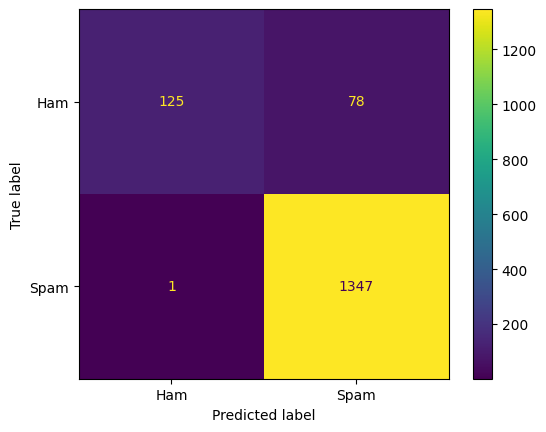

In [40]:
import matplotlib.pyplot as plt
confusion_matrix = confusion_matrix(Y_test, y_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ["Ham", "Spam"])
cm_display.plot()
plt.show()

In [ ]:
y_pred
y_test


In [42]:
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.62      0.76       203
           1       0.95      1.00      0.97      1348

    accuracy                           0.95      1551
   macro avg       0.97      0.81      0.87      1551
weighted avg       0.95      0.95      0.94      1551



In [43]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay

classifier = LogisticRegression()
classifier.fit(X_train_features, Y_train)


LogisticRegression()

In [44]:
y_pred = classifier.predict(X_test_features)
accuracy_on_test_data = accuracy_score(Y_test, y_pred)
accuracy_on_test_data

0.9426176660219213

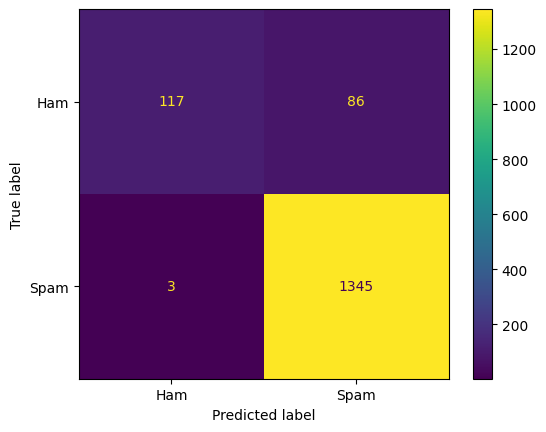

In [45]:
import matplotlib.pyplot as plt
confusion_matrix = confusion_matrix(Y_test, y_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ["Ham", "Spam"])
cm_display.plot()
plt.show()

In [46]:
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.58      0.72       203
           1       0.94      1.00      0.97      1348

    accuracy                           0.94      1551
   macro avg       0.96      0.79      0.85      1551
weighted avg       0.94      0.94      0.94      1551

